## **Objective:**
* This project aims to leverage data containing information on existing solar power projects within the target area. Through the analysis of this data, our goal is to group(cluster) geographical areas based on their overall energy production.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv("/content/Statewide Solar Projects.csv", low_memory=False)
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


# **Data Wrangling**

In [8]:
df.shape

(218115, 17)

In [9]:
df.columns

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [12]:
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [13]:
df.isnull().sum()

,0
Data Through Date,0
Project ID,3
Interconnection Date,0
Utility,0
City/Town,58
County,0
Zip,96
Division,85234
Substation,79944
Circuit ID,30


In [14]:
columns_to_drop = ['Project ID','Zip','Circuit ID','Energy Storage System Size (kWac)','Division','Substation']
df = df.drop(columns=columns_to_drop)

*I have dropped the 'Project ID','Zip','Circuit ID','Energy Storage System Size (kWac)','Division',and substation column because some of the columns has largest number of null values and some of the columns are not relevant for the analysis*

In [15]:
df.isnull().sum()

,0
Data Through Date,0
Interconnection Date,0
Utility,0
City/Town,58
County,0
Developer,10550
Metering Method,463
Estimated PV System Size (kWdc),0
PV System Size (kWac),0
Estimated Annual PV Energy Production (kWh),0


In [19]:
df['Utility'].unique()

array(['Con Ed', 'PSEGLI', 'O&R', 'Central Hudson', 'National Grid',
       'NYSEG', 'RGE'], dtype=object)

In [20]:
df['City/Town'].nunique()

3009

In [21]:
df['County'].nunique()

62

In [22]:
df.duplicated().sum()

4763

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df['County'].value_counts().head(5)

,count
County,
Suffolk,51383
Nassau,31985
Queens,22535
Westchester,12212
Richmond,11397


In [27]:
df['City/Town'].value_counts().head(5)

,count
City/Town,
STATEN ISLAND,6207
BROOKLYN,5767
Brooklyn,5356
Staten Island,5015
Jamaica,3277


In [28]:
df['City/Town'] = df['City/Town'].apply(lambda x: str(x).lower())

In [29]:
df = df.dropna(subset=['City/Town'])

In [30]:
df.isnull().sum()

,0
Data Through Date,0
Interconnection Date,0
Utility,0
City/Town,0
County,0
Developer,10429
Metering Method,444
Estimated PV System Size (kWdc),0
PV System Size (kWac),0
Estimated Annual PV Energy Production (kWh),0


In [31]:
df['Developer'].nunique()

2567

In [32]:
df['Developer'].value_counts().head(5)

,count
Developer,
Vivint Solar,12694
MOMENTUM SOLAR,12436
Sunrun Inc,11437
Solar City,11326
Other,6262


In [33]:
import random
df['Developer'].fillna(random.choice(df['Developer'].dropna().unique()), inplace=True)

*The provided code fills missing values in the 'Developer' column of the DataFrame df with a randomly chosen non-null value from the existing unique values in the 'Developer' column.*

In [34]:
df.isnull().sum()

,0
Data Through Date,0
Interconnection Date,0
Utility,0
City/Town,0
County,0
Developer,0
Metering Method,444
Estimated PV System Size (kWdc),0
PV System Size (kWac),0
Estimated Annual PV Energy Production (kWh),0


In [35]:
df['Metering Method'].nunique()

6

In [36]:
df['Metering Method'].value_counts()

,count
Metering Method,
NM,210689
RNM,1040
CDG,996
RC,91
FIT,88
RFP,4


In [37]:
df['Metering Method'].fillna(df['Metering Method'].mode()[0], inplace=True)

In [38]:
df.isnull().sum()

,0
Data Through Date,0
Interconnection Date,0
Utility,0
City/Town,0
County,0
Developer,0
Metering Method,0
Estimated PV System Size (kWdc),0
PV System Size (kWac),0
Estimated Annual PV Energy Production (kWh),0


In [39]:
df['Interconnection Date']=pd.to_datetime(df['Interconnection Date'])

*Converted the 'Interconnection Date' column to datetime format and extracts the month component, replacing the original column with the month values.*

In [40]:
df['Interconnection Date'].dt.month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

In [41]:
df['Interconnection Date'] = df['Interconnection Date'].dt.month

In [42]:
df['Interconnection Date'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

In [43]:
df['Data Through Date']=pd.to_datetime(df['Data Through Date'])

*Coverted Data Through Date column to datetime format and extracts the month component, replacing the original column with the month values.*

In [44]:
df['Data Through Date'].dt.month.unique()

array([12], dtype=int32)

In [45]:
df['Data Through Date'] = df['Data Through Date'].dt.month

In [46]:
df['Data Through Date'].unique()

array([12], dtype=int32)

In [47]:
df.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12,12,Con Ed,richmond hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12,12,Con Ed,bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12,12,Con Ed,brooklyn,Kings,SUNCO,NM,3.05,2.61,3585,1
3,12,12,Con Ed,brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,12,12,Con Ed,springfield gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1


In [48]:
# Rename the "Interconnection Date" column to "Interconnection Month"
df.rename(columns={'Interconnection Date': 'Interconnection Month'}, inplace=True)

# Rename the "Data Through Date" column to "Data Through Month"
df.rename(columns={'Data Through Date': 'Data Through Month'}, inplace=True)

In [49]:
df.isnull().sum()

,0
Data Through Month,0
Interconnection Month,0
Utility,0
City/Town,0
County,0
Developer,0
Metering Method,0
Estimated PV System Size (kWdc),0
PV System Size (kWac),0
Estimated Annual PV Energy Production (kWh),0


# **Exploratory Data Analysis**

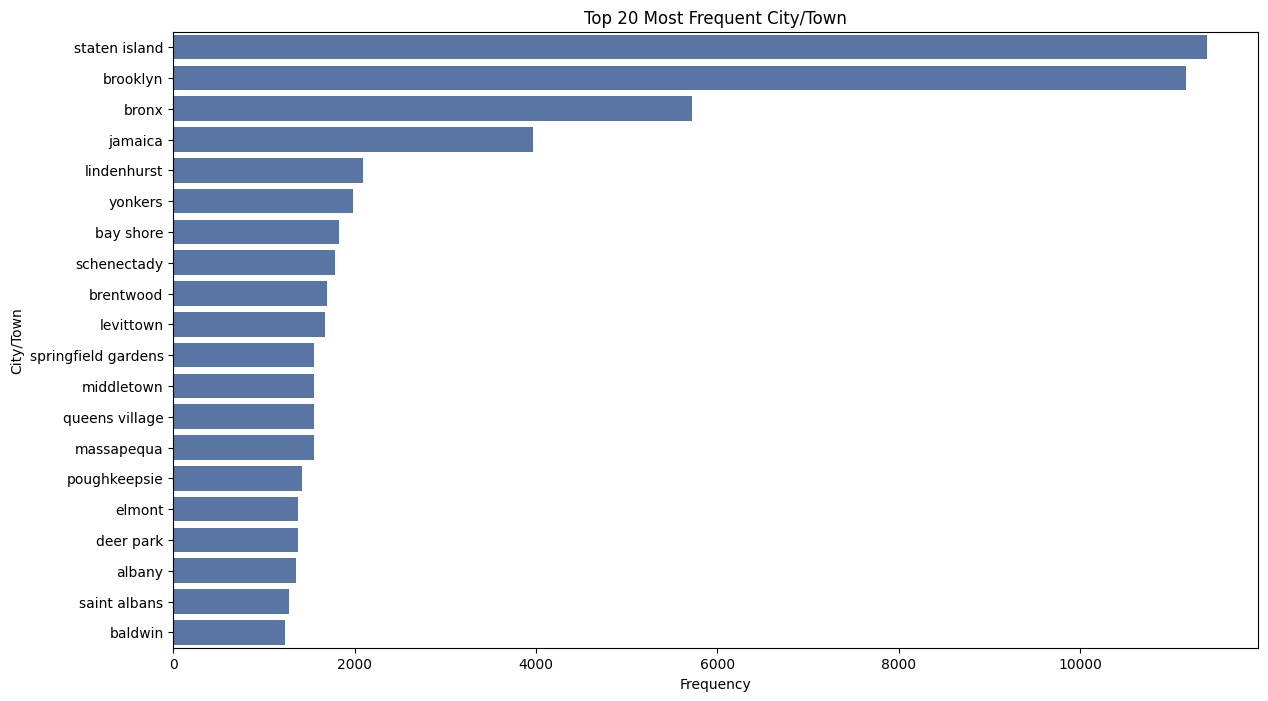

In [58]:
# Plot distribution of City/Town frequencies using a count plot
plt.figure(figsize=(14, 8))
sns.set_palette("deep")
sns.countplot(y='City/Town', data=df, order=df['City/Town'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Frequent City/Town')
plt.xlabel('Frequency')
plt.ylabel('City/Town')
plt.show()

## **Findings:**

* Staten Island City has the highest frequency, exceeding 10,000 occurrences.

* Brooklyn ranks second in frequency but falls slightly behind Staten Island.

* Baldwin City records the lowest frequency among the observed locations.

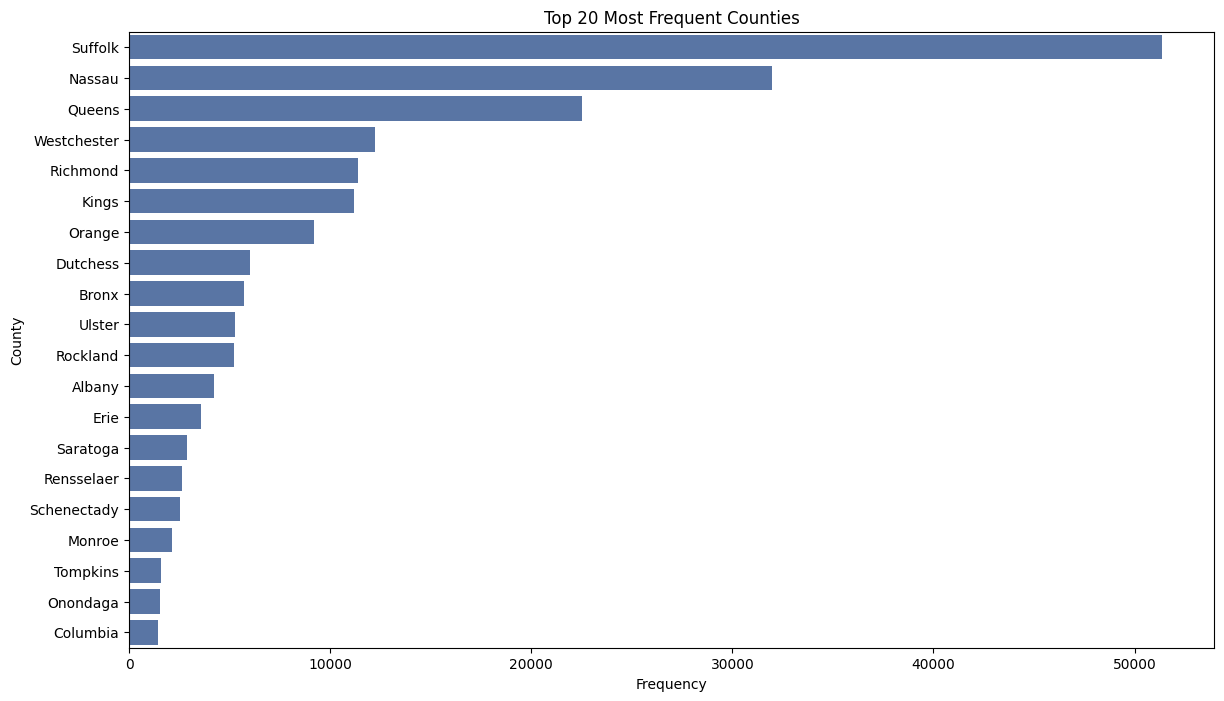

In [59]:
# Plot distribution of County frequencies using a count plot
plt.figure(figsize=(14, 8))
sns.countplot(y='County', data=df, order=df['County'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Frequent Counties')
plt.xlabel('Frequency')
plt.ylabel('County')
plt.show()

## **Findings:**

* Suffolk County emerges as the most frequent county, with a frequency exceeding 50,000.

* Nassau County follows closely, with a frequency ranging between 30,000 and 40,000.

* Columbia County exhibits the lowest frequency among all counties surveyed.

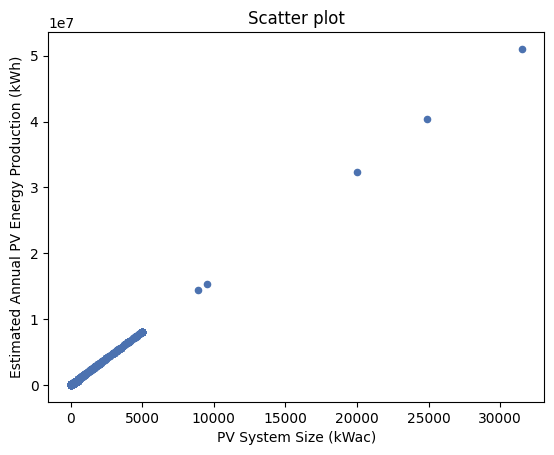

In [60]:
#Scatter plot of PV System Size (kWac) vs Estimated Annual PV Energy Production (kWh)
df.plot.scatter(x='PV System Size (kWac)', y='Estimated Annual PV Energy Production (kWh)', title='Scatter plot')
plt.show()

## **Findings:**

* I have used the scatter plot to see the linear relationship between  PV system size (kWac) and estimated annual PV energy production (kWh).

* But It is not showing me the linear relationship between both the columns.

* The presence of outliers are influencing the relationship between PV system size and estimated annual PV energy production.

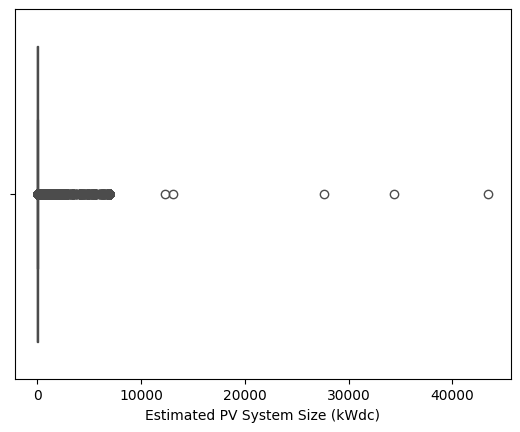

In [62]:
sns.boxplot(x='Estimated PV System Size (kWdc)', data=df)
plt.show()

In [63]:
column_to_cap = 'Estimated PV System Size (kWdc)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [64]:
lower_limit

-2.2250000000000005

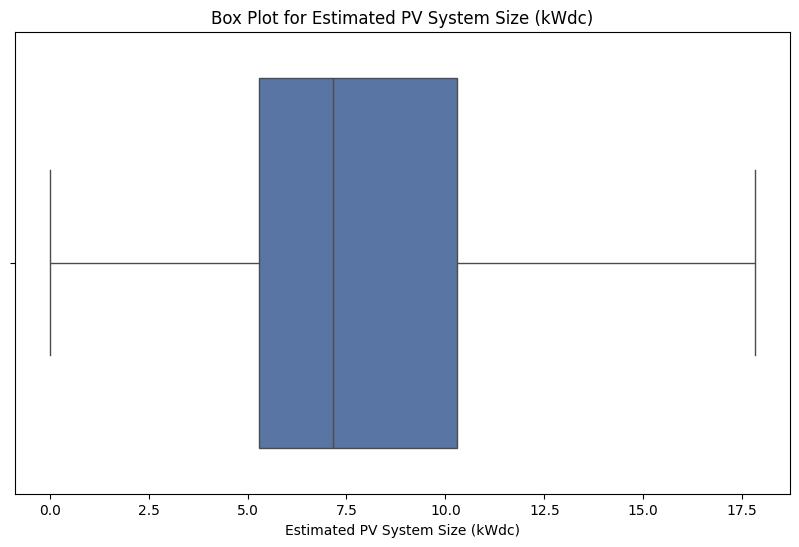

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Estimated PV System Size (kWdc)'])
plt.title('Box Plot for Estimated PV System Size (kWdc)')
plt.show()

<Axes: xlabel='PV System Size (kWac)'>

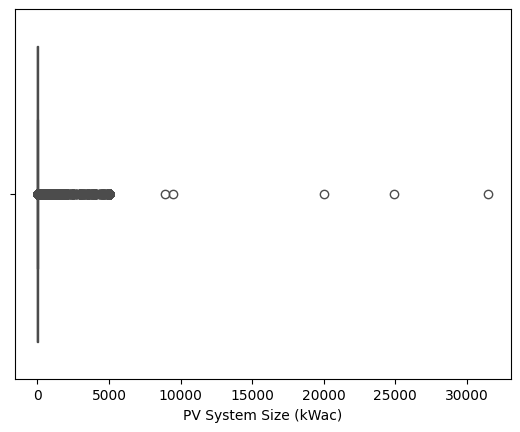

In [66]:
sns.boxplot(x='PV System Size (kWac)', data=df)

In [67]:
column_to_cap = 'PV System Size (kWac)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [68]:
lower_limit

-1.9000000000000021

In [69]:
upper_limit

15.220000000000002

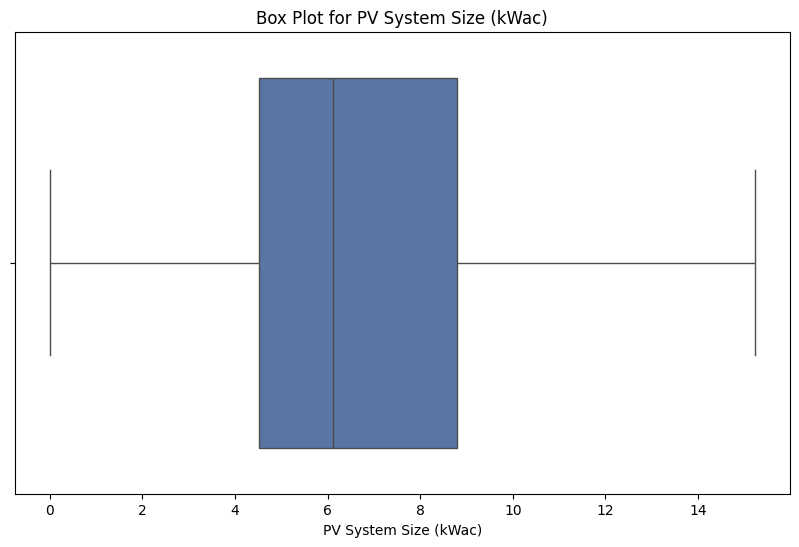

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PV System Size (kWac)'])
plt.title('Box Plot for PV System Size (kWac)')
plt.show()

<Axes: xlabel='Estimated Annual PV Energy Production (kWh)'>

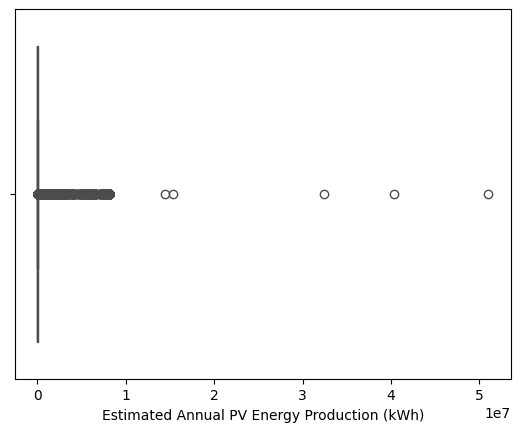

In [71]:
sns.boxplot(x='Estimated Annual PV Energy Production (kWh)', data=df)

In [72]:
column_to_cap = 'Estimated Annual PV Energy Production (kWh)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [73]:
lower_limit

-2609.0

In [74]:
upper_limit

20903.0

<Axes: xlabel='Estimated Annual PV Energy Production (kWh)'>

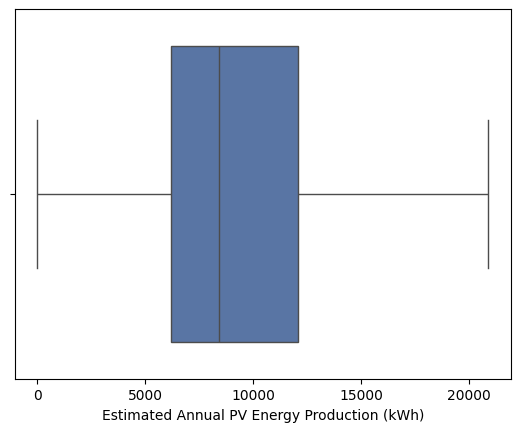

In [75]:
sns.boxplot(x='Estimated Annual PV Energy Production (kWh)', data=df)

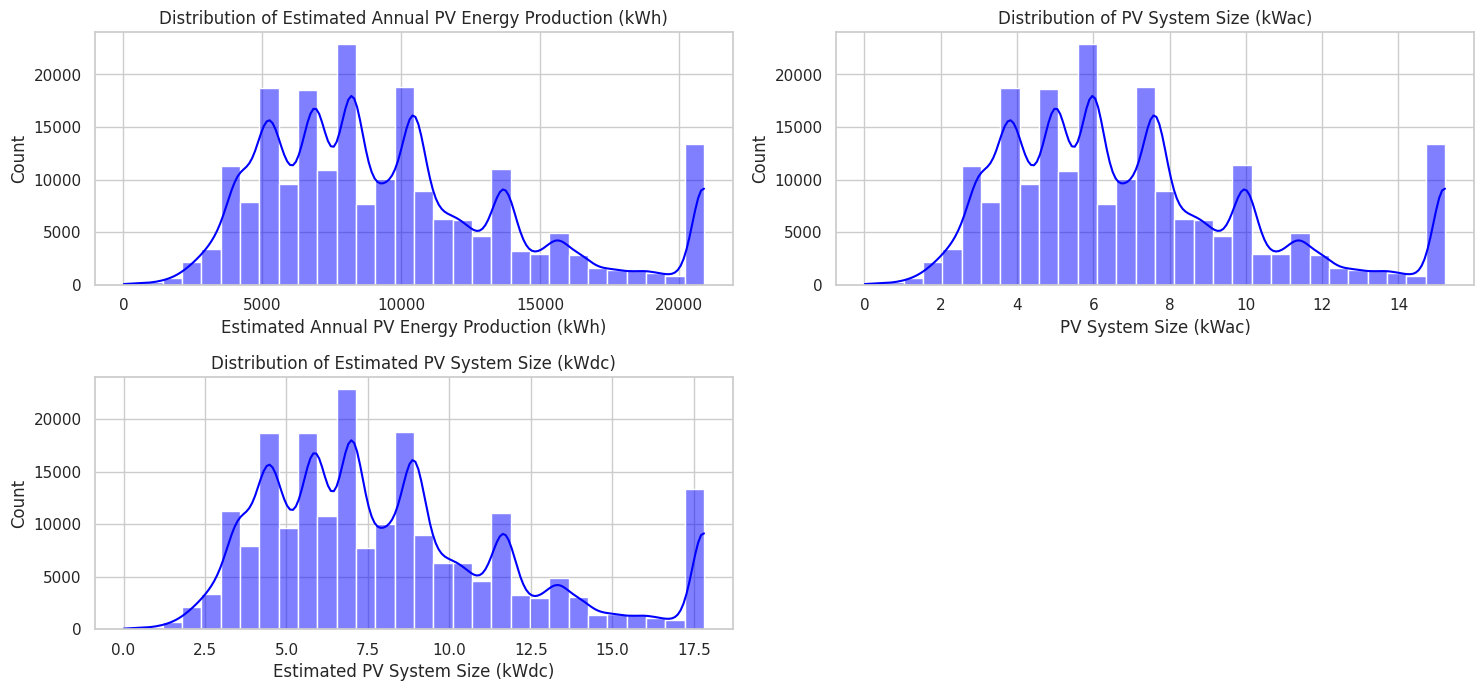

In [76]:
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = df[['Estimated Annual PV Energy Production (kWh)','PV System Size (kWac)','Estimated PV System Size (kWdc)']]

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
  plt.subplot(3, 2, i + 1)
  sns.histplot(df[var], kde=True, bins=30, color='blue')
  plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

## **Findings:**

* Distribution of Estimated Annual PV Energy Production (kWh): The distribution is multimodal with peaks around 5,000 and 10,000 kWh, indicating common system sizes, but shows a significant increase at 20,000 kWh.

* Distribution of PV System Size (kWac): The PV system size in kWac has multiple peaks, notably around 5 kWac, suggesting common installations around this size, with a large spike at 15 kWac.

* Distribution of Estimated PV System Size (kWdc): The system size in kWdc mirrors the kWac distribution, with multiple peaks around 5 to 7 kWdc, and a sharp rise at around 17.5 kWdc.

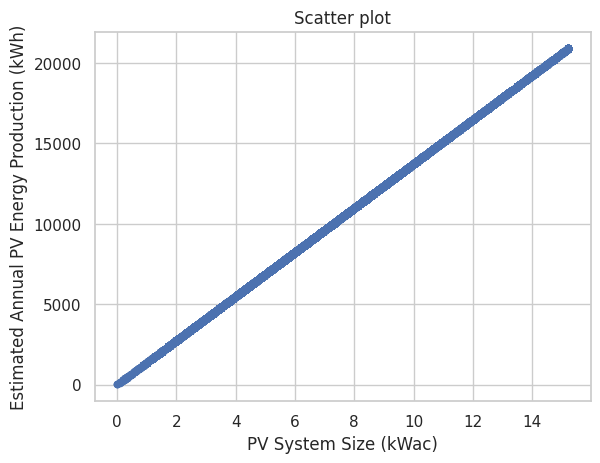

In [77]:
#Scatter plot of PV System Size (kWac) vs Estimated Annual PV Energy Production (kWh)
df.plot.scatter(x='PV System Size (kWac)', y='Estimated Annual PV Energy Production (kWh)', title='Scatter plot')
plt.show()

## **Findings:**

* I have used the scatter plot to see the linear relationship between  PV system size (kWac) and estimated annual PV energy production (kWh).

* After Removing the Outliers, It is showing me the linear relationship between both the columns.


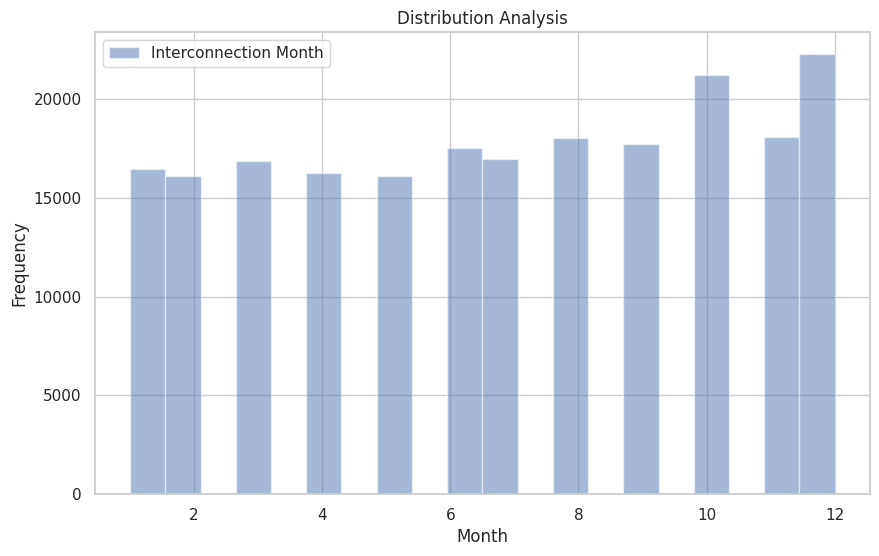

In [78]:
# Plotting histograms for distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Interconnection Month'], bins=20, alpha=0.5, label='Interconnection Month')
plt.title('Distribution Analysis')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## **Findings**

* December month has Peaks in frequency with higher interconnection rates as compare to other months

## **Scaling(Normalization)**

* The provided code utilizes the MinMaxScaler from scikit-learn to perform min-max scaling on three numerical features: 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)', and 'Estimated Annual PV Energy Production (kWh)'. Here's the conclusion:

* The MinMaxScaler scales the features to a fixed range between 0 and 1, ensuring that all features are standardized and have a comparable scale.

* The scaled features are then used to create a new DataFrame, 'scaled_df', containing the transformed data, with each feature now normalized.

* This preprocessing step is valuable for machine learning tasks, as it helps mitigate the impact of varying scales among features and facilitates more effective model training and evaluation.

In [79]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']])

scaled_df = pd.DataFrame(scaled_features, columns=['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)'])

In [80]:
finaldf = scaled_df[['Estimated PV System Size (kWdc)','PV System Size (kWac)','Estimated Annual PV Energy Production (kWh)']]

In [81]:
finaldf.head()

,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh)
0,0.339231,0.339250,0.339222
1,0.377984,0.378041,0.378046
2,0.170739,0.170940,0.170951
3,0.315080,0.314924,0.314903
4,0.339231,0.339250,0.339222


## **K-Means Clustering Algorithm:**

* K-means clustering is an unsupervised machine learning algorithm.

* It partitions a dataset into K distinct clusters.

* The objective is to minimize the within-cluster variance.

* Each cluster is represented by its centroid, calculated as the mean of the data points in the cluster.

* The algorithm iteratively assigns data points to the nearest centroid and updates the centroids based on the mean of the data points in each cluster.

* The process continues until convergence, where centroids no longer change significantly, or a specified number of iterations is reached.

* K-means clustering finds applications in customer segmentation, image segmentation, and anomaly detection, among others.

In [96]:
X = finaldf[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']].values

In [97]:
def calculate_distortion(X, n_clusters):
    distortions = []
    for i in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

* The function takes two arguments: X (the dataset) and n_clusters (the maximum number of clusters to consider).

* It initializes an empty list called distortions to store the distortion values for each number of clusters.

* It iterates through each possible number of clusters from 1 to n_clusters.

* For each iteration, it creates a KMeans object with the specified number of clusters and fits it to the dataset X.

* It computes the inertia of the KMeans model, which is a measure of how tightly clustered the data points are around the centroids.

* The inertia value is appended to the distortions list.

* Finally, the function returns the list of distortion values for different numbers of clusters.

In [98]:
def plot_elbow(distortions, n_clusters):
    plt.plot(range(1, n_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

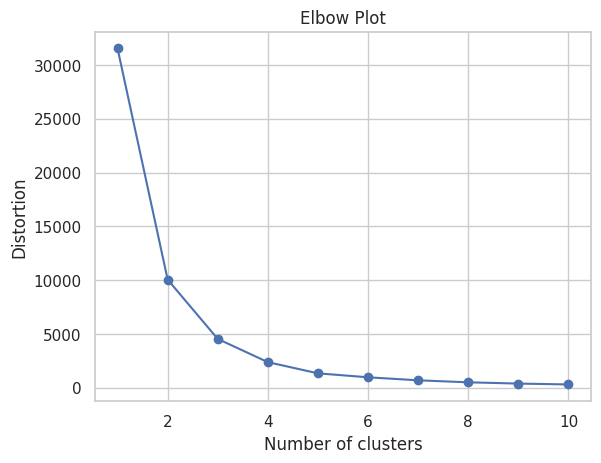

In [99]:
distortions = calculate_distortion(X, n_clusters=10)
plot_elbow(distortions, n_clusters=10)

* Based on the elbow method, 3 appears to be the most suitable number of clusters for the given dataset.

* This insight can guide further analysis and decision-making processes, such as segmenting data into distinct groups for targeted actions or understanding underlying patterns within the data.

In [100]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


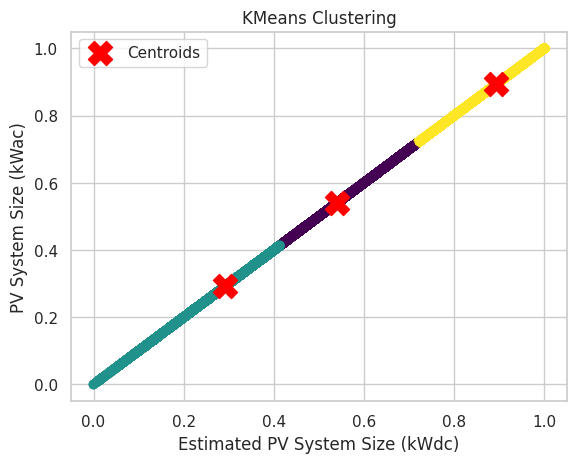

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('PV System Size (kWac)')
plt.legend()
plt.show()

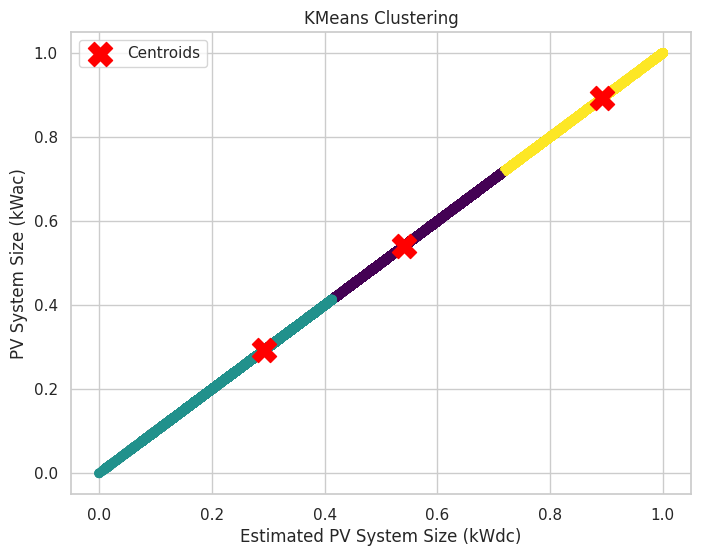

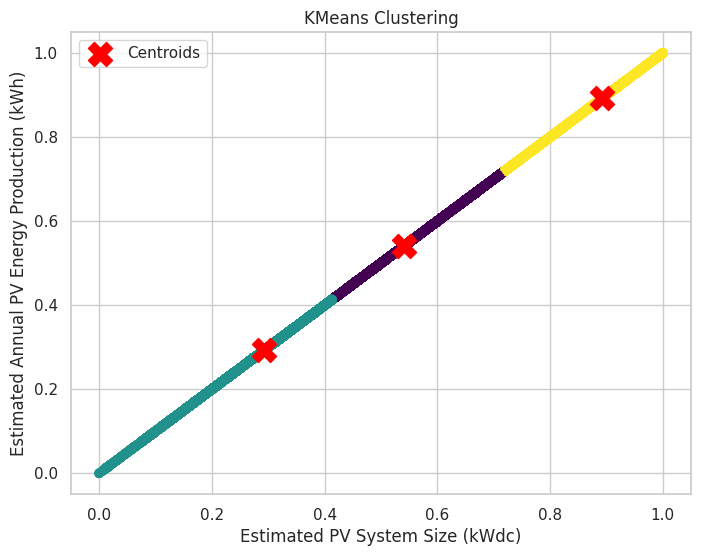

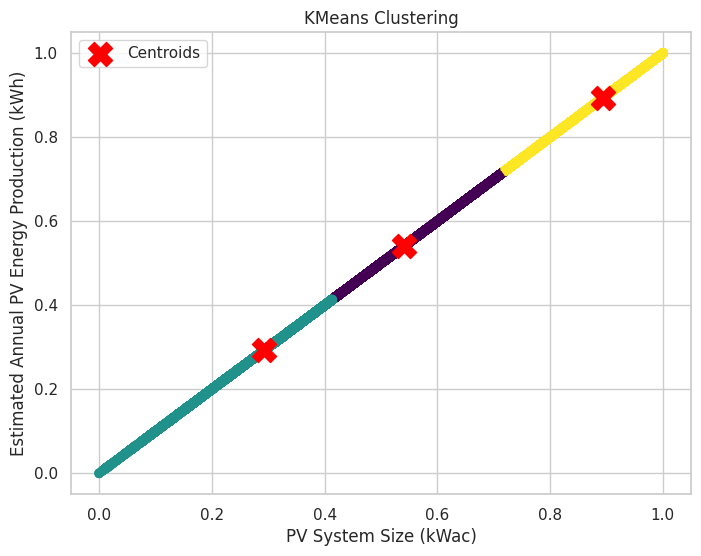

In [102]:
feature_names = ['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']

for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, i], X[:, j], c=labels, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], s=300, c='red', marker='X', label='Centroids')
        plt.title('KMeans Clustering')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        plt.show()

*The linear grouping and placement of centroids suggest that the algorithm effectively separates the data into three clusters based on their feature values.*

## **Conclusion:**

* The addition of the 'Cluster' and 'Segment' columns enables the DataFrame to categorize each data point into meaningful segments based on the clustering results.

* In the higher zone, the estimated annual PV energy production is the highest at 18.67k, followed by 11.32k in the lower zone and 6.12k in the moderate zone.

* The average PV system size in the higher zone is the highest among all zones, indicating larger solar installations in this area.

* In December, all annual PV energy production occurs, indicating that December is a significant month for solar energy production, potentially due to favorable weather conditions or operational factors.